In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os,time
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
plt.rcParams.update({'font.size': 16})
from Jfactor import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


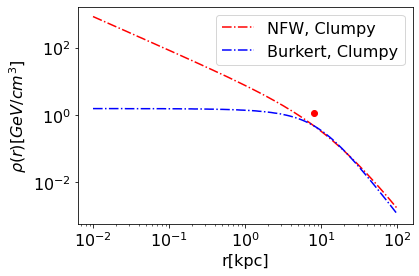

In [5]:
# Density from charon and clumpy
process = "ann"
profile = ["NFW", "Burkert"]
# Create Jfactor object
MyJ = Jf(process)
# Labels + color for the plot:
colors = {"NFW":'red', "Burkert":'blue'}

r = np.logspace(-2,2,100)
# Plot:
# rs = {"NFW":24.42, "Burkert":12.67}
# rhos = {"NFW":0.184, "Burkert":0.712}

rs = {"NFW":16.1, "Burkert":9.26}
rhos = {"NFW":1.4, "Burkert":4.13}

for pr in profile:
    MyJ.profile = pr
    P_Clumpy = MyJ.profile_Clumpy()
    # P_Charon = MyJ.profile_Charon(r, default=False, rs=rs[pr], rhos=rhos[pr], gamma=1.)
    plt.plot(P_Clumpy["r"], P_Clumpy["rho"], color=colors[pr], label='{}, Clumpy'.format(pr), linestyle='-.')
    # plt.plot(P_Charon["r"], P_Charon["rho"], color=colors[pr], label='{}, Charon'.format(pr))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('r[kpc]')
plt.ylabel(r'$\rho(r)[GeV/cm^{3}]$')
plt.plot(8, 1.2, 'ro')


plt.legend()

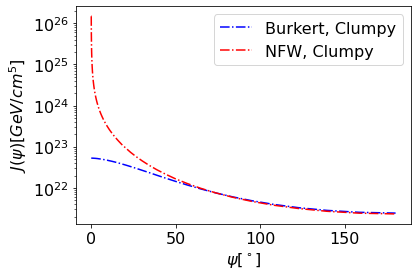

In [7]:
# Jfactor from Charon and Clumpy:
psi = np.linspace(0.,180,80)
profile=["Burkert", "NFW"]


for pr in profile:
    MyJ.profile = pr
    J_Clumpy = MyJ.Jfactor_Clumpy()
    # J_Charon = MyJ.Jfactor_Charon(psi,rs=rs[pr], rhos=rhos[pr], gamma=1.)
    plt.plot(J_Clumpy["psi"], J_Clumpy["J"], color=colors[pr], label='{}, Clumpy'.format(pr), linestyle='-.')
    # new = [J/np.pi for J in J_Charon["J"]]
    # plt.plot(J_Charon["psi"], J_Charon["J"], color=colors[pr], label='{}, Charon'.format(pr))

    # Save the Clumpy Jfactor
    pkl.dump(J_Clumpy,open("JFactor_{}.pkl".format(pr),"wb"))
    
    
# plt.yscale('log')
plt.semilogy()
plt.xlabel(r'$\psi[^\circ]$')
plt.ylabel(r'$J(\psi)[GeV/cm^{5}]$')
plt.legend()